In [419]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from  sklearn.model_selection  import  GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

First we import our labels into a dataframe and check the output

In [420]:
label_df= pd.DataFrame()
label_df = pd.read_csv("faceLabel.csv")
label_df

,Label
0,13
1,30
2,34
3,19
4,24
...,...
395,32
396,19
397,11
398,4


Next we create a dataframe with each image being a sample and each pixel being a feature for that sample

In [421]:
N = 400 # number of images
feature=[]

for num in range(N):
    filename = str(num)+".jpg"
    image = mpimg.imread("Face/" + filename)
    image_Arr = np.asarray(image).reshape(-1) 
    feature.append(image_Arr) 

In [422]:
img_df = pd.DataFrame(feature)

In [423]:
img_df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,186,183,179,190,212,219,221,232,230,231,...,56,45,47,18,0,8,15,9,3,5
1,204,198,194,195,198,195,190,186,190,193,...,19,0,29,52,90,146,130,120,164,167
2,86,79,82,95,100,102,121,146,169,179,...,160,167,179,169,192,188,197,189,185,141
3,61,90,98,119,144,156,174,177,183,195,...,119,244,246,168,126,187,162,145,58,18
4,99,134,165,183,201,210,215,224,232,236,...,83,90,94,90,70,41,71,103,92,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,19,13,7,7,14,18,15,10,33,38,...,158,204,166,68,147,184,188,163,156,143
396,109,145,182,196,195,192,189,184,165,167,...,110,122,69,44,40,49,46,40,43,44
397,163,177,193,202,211,221,227,229,235,238,...,29,10,25,34,43,47,45,44,48,53
398,145,147,151,160,178,196,203,202,201,200,...,168,162,165,152,150,150,124,132,114,117


Next we normalize the features and place them back into a dataframe

In [424]:
scaled_df = preprocessing.scale(img_df)
scaled_df

array([[ 1.37649641,  1.11885303,  0.79610373, ..., -1.17094622,
        -1.24726506, -1.21711982],
       [ 1.68113398,  1.3654141 ,  1.03570156, ...,  0.68710075,
         1.48558299,  1.58234648],
       [-0.31593455, -0.59063704, -0.75329558, ...,  1.84210291,
         1.84204144,  1.13304942],
       ...,
       [ 0.98723729,  1.02022861,  1.01972837, ..., -0.58507555,
        -0.48342554, -0.38764832],
       [ 0.68259971,  0.52710647,  0.34885444, ...,  0.88797069,
         0.63687242,  0.71831368],
       [-0.231313  , -0.67282406, -1.0088666 , ..., -0.06616154,
        -0.55132239, -0.50861291]])

In [425]:
df = pd.DataFrame(data = scaled_df, columns = img_df.columns.values)
df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1.376496,1.118853,0.796104,0.763445,0.958018,0.942786,0.847410,0.960266,0.840342,0.820069,...,-0.710060,-0.846611,-0.792436,-1.207042,-1.450476,-1.283186,-1.106845,-1.170946,-1.247265,-1.217120
1,1.681134,1.365414,1.035702,0.843617,0.725408,0.521762,0.264739,0.020081,-0.018794,-0.027663,...,-1.423446,-1.628179,-1.105583,-0.636535,0.080459,1.022764,0.756599,0.687101,1.485583,1.582346
2,-0.315935,-0.590637,-0.753296,-0.759837,-0.902856,-1.109705,-1.032173,-0.797471,-0.469840,-0.339985,...,1.295133,1.272305,1.503976,1.326681,1.815519,1.724575,1.842258,1.842103,1.842041,1.133049
3,-0.739042,-0.409826,-0.497725,-0.375008,-0.171799,-0.162401,-0.035994,-0.163868,-0.169142,0.016955,...,0.504624,2.609654,2.669579,1.309901,0.692833,1.707865,1.275123,1.105580,-0.313683,-0.992471
4,-0.095919,0.313420,0.572479,0.651203,0.775253,0.784902,0.734635,0.796756,0.883299,0.931612,...,-0.189481,-0.065044,0.025226,0.001091,-0.259749,-0.731763,-0.199429,0.402535,0.263440,0.718314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.449863,-1.675506,-1.951285,-2.170877,-2.331741,-2.583288,-3.024532,-3.577148,-3.390903,-3.485514,...,1.256572,1.914927,1.277814,-0.368061,1.050051,1.657736,1.696423,1.406885,1.349789,1.167611
396,0.073325,0.494232,0.844023,0.859652,0.675564,0.469134,0.245944,-0.020796,-0.555754,-0.607690,...,0.331098,0.490738,-0.409701,-0.770772,-0.770060,-0.598085,-0.604526,-0.652032,-0.568297,-0.543174
397,0.987237,1.020229,1.019728,0.955859,0.941403,0.977871,0.960185,0.898950,0.947735,0.976230,...,-1.230639,-1.454497,-1.175171,-0.938568,-0.719029,-0.631505,-0.620730,-0.585076,-0.483426,-0.387648
398,0.682600,0.527106,0.348854,0.282408,0.393110,0.539305,0.509085,0.347102,0.217469,0.128498,...,1.449379,1.185464,1.260417,1.041427,1.101083,1.089603,0.659376,0.887971,0.636872,0.718314


Next we create our X and Y matrices and split the data into testing and training sets

In [426]:
feature_cols = df.columns.values
x = df[feature_cols]
y = label_df['Label']

# print the first 5 rows
x
#y

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1.376496,1.118853,0.796104,0.763445,0.958018,0.942786,0.847410,0.960266,0.840342,0.820069,...,-0.710060,-0.846611,-0.792436,-1.207042,-1.450476,-1.283186,-1.106845,-1.170946,-1.247265,-1.217120
1,1.681134,1.365414,1.035702,0.843617,0.725408,0.521762,0.264739,0.020081,-0.018794,-0.027663,...,-1.423446,-1.628179,-1.105583,-0.636535,0.080459,1.022764,0.756599,0.687101,1.485583,1.582346
2,-0.315935,-0.590637,-0.753296,-0.759837,-0.902856,-1.109705,-1.032173,-0.797471,-0.469840,-0.339985,...,1.295133,1.272305,1.503976,1.326681,1.815519,1.724575,1.842258,1.842103,1.842041,1.133049
3,-0.739042,-0.409826,-0.497725,-0.375008,-0.171799,-0.162401,-0.035994,-0.163868,-0.169142,0.016955,...,0.504624,2.609654,2.669579,1.309901,0.692833,1.707865,1.275123,1.105580,-0.313683,-0.992471
4,-0.095919,0.313420,0.572479,0.651203,0.775253,0.784902,0.734635,0.796756,0.883299,0.931612,...,-0.189481,-0.065044,0.025226,0.001091,-0.259749,-0.731763,-0.199429,0.402535,0.263440,0.718314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.449863,-1.675506,-1.951285,-2.170877,-2.331741,-2.583288,-3.024532,-3.577148,-3.390903,-3.485514,...,1.256572,1.914927,1.277814,-0.368061,1.050051,1.657736,1.696423,1.406885,1.349789,1.167611
396,0.073325,0.494232,0.844023,0.859652,0.675564,0.469134,0.245944,-0.020796,-0.555754,-0.607690,...,0.331098,0.490738,-0.409701,-0.770772,-0.770060,-0.598085,-0.604526,-0.652032,-0.568297,-0.543174
397,0.987237,1.020229,1.019728,0.955859,0.941403,0.977871,0.960185,0.898950,0.947735,0.976230,...,-1.230639,-1.454497,-1.175171,-0.938568,-0.719029,-0.631505,-0.620730,-0.585076,-0.483426,-0.387648
398,0.682600,0.527106,0.348854,0.282408,0.393110,0.539305,0.509085,0.347102,0.217469,0.128498,...,1.449379,1.185464,1.260417,1.041427,1.101083,1.089603,0.659376,0.887971,0.636872,0.718314


In [427]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

# print the size of the traning set:
print(x_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(x_test.shape)
print(y_test.shape)

(300, 4096)
(300,)
(100, 4096)
(100,)


Below, we perform some dimensionality reduction with PCA

In [428]:
#Number of new features after dimensionality reduction
k = 50
my_pca = PCA(n_components = k)

# X_Train is feature matrix of training set before dimensionality reduction, 
# X_Train_New is feature matrix of training set after dimensionality reduction:
x_train_new = my_pca.fit_transform(x_train)

x_test_new = my_pca.transform(x_test)

In [429]:
#x_train_new.shape
#x_test_new.shape

Next, we instantiate the SVM model, train it, test it, and return an accuracy score.

In [430]:
my_SVM = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
my_SVM.fit(x_train, y_train)
y_predict = my_SVM.predict(x_test)

In [431]:
score_SVM = accuracy_score(y_test, y_predict)
print('\n','accuracy: ', score_SVM)


 accuracy:  0.86


Below we return the Confusion Matrix

In [432]:
con_matrix = metrics.confusion_matrix(y_test, y_predict)

In [433]:
con_matrix

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

Here below, we note the incorrect predictions for our SVM model, and print out mismatched samples

In [434]:
results = pd.DataFrame()

results['actual'] = y_test
results['prediction'] = y_predict

results

,actual,prediction
218,16,16
191,32,32
117,4,39
50,24,22
348,29,29
...,...,...
368,33,33
89,32,32
182,13,13
219,38,38


In [435]:
notMatching = []
mismatchedPairs = []
notMatching.clear
mismatchedPairs.clear
for x1, y1, z in zip(results['actual'].values, results['prediction'].values, results.index ):
    if x1 != y1:
        notMatching.append(z)
        mismatchedPairs.append((x1,y1))
        #Printing and checking the values
        print(x1,y1,z)

4 39 117
24 22 50
38 28 282
0 7 43
9 39 302
25 2 47
26 3 21
13 3 155
16 3 170
23 3 122
24 3 370
11 37 397
5 12 335
24 39 353


In [436]:
notMatching

[117, 50, 282, 43, 302, 47, 21, 155, 170, 122, 370, 397, 335, 353]

In [437]:
mismatchedPairs

[(4, 39),
 (24, 22),
 (38, 28),
 (0, 7),
 (9, 39),
 (25, 2),
 (26, 3),
 (13, 3),
 (16, 3),
 (23, 3),
 (24, 3),
 (11, 37),
 (5, 12),
 (24, 39)]

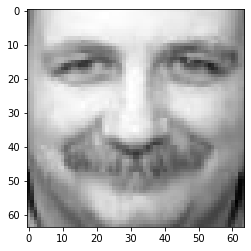

In [438]:
%matplotlib inline

#Sample 117 Actual
image = mpimg.imread("Face/4.jpg")
plt.imshow(image, cmap=plt.cm.gray)

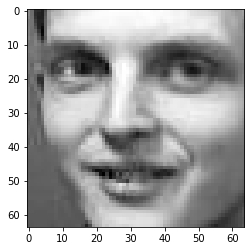

In [439]:
#Sample 117 Prediction
image = mpimg.imread("Face/39.jpg")
plt.imshow(image, cmap=plt.cm.gray)

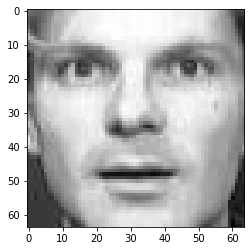

In [440]:
#Sample 50 Actual
image = mpimg.imread("Face/24.jpg")
plt.imshow(image, cmap=plt.cm.gray)

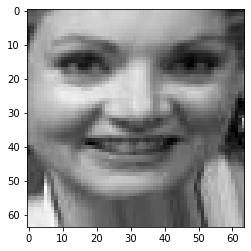

In [441]:
#Sample 50 Prediction
image = mpimg.imread("Face/2.jpg")
plt.imshow(image, cmap=plt.cm.gray)

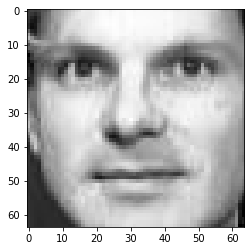

In [442]:
#Sample 282 Actual
image = mpimg.imread("Face/38.jpg")
plt.imshow(image, cmap=plt.cm.gray)

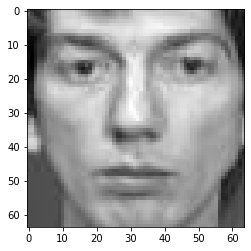

In [443]:
#Sample 282 Prediction
image = mpimg.imread("Face/28.jpg")
plt.imshow(image, cmap=plt.cm.gray)

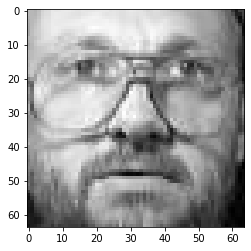

In [444]:
#Sample 43 Actual
image = mpimg.imread("Face/0.jpg")
plt.imshow(image, cmap=plt.cm.gray)

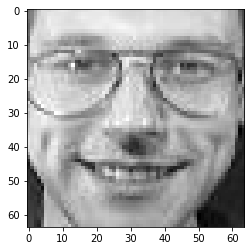

In [445]:
#Sample 43 Prediction
image = mpimg.imread("Face/7.jpg")
plt.imshow(image, cmap=plt.cm.gray)

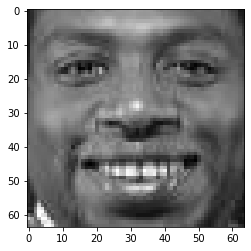

In [446]:
#Sample 302 Actual
image = mpimg.imread("Face/9.jpg")
plt.imshow(image, cmap=plt.cm.gray)

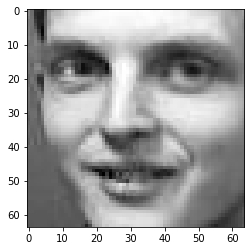

In [447]:
#Sample 302 Prediction
image = mpimg.imread("Face/39.jpg")
plt.imshow(image, cmap=plt.cm.gray)

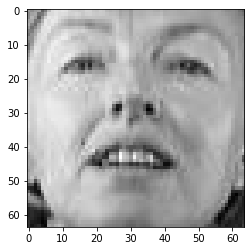

In [448]:
#Sample 47 Actual
image = mpimg.imread("Face/25.jpg")
plt.imshow(image, cmap=plt.cm.gray)

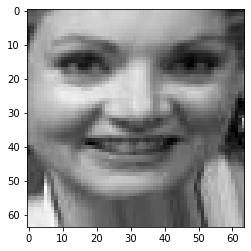

In [449]:
#Sample 47 Prediction
image = mpimg.imread("Face/2.jpg")
plt.imshow(image, cmap=plt.cm.gray)

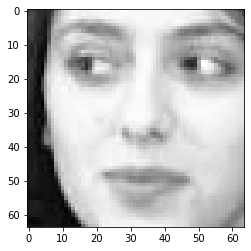

In [450]:
#Sample 21 Actual
image = mpimg.imread("Face/26.jpg")
plt.imshow(image, cmap=plt.cm.gray)

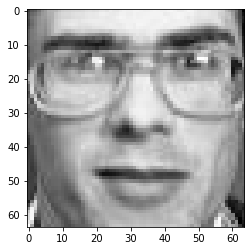

In [451]:
#Sample 47 Prediction
image = mpimg.imread("Face/3.jpg")
plt.imshow(image, cmap=plt.cm.gray)

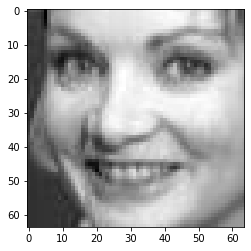

In [452]:
#Sample 155 Actual
image = mpimg.imread("Face/13.jpg")
plt.imshow(image, cmap=plt.cm.gray)

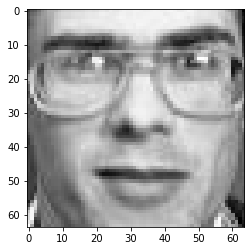

In [453]:
#Sample 155 Prediction
image = mpimg.imread("Face/3.jpg")
plt.imshow(image, cmap=plt.cm.gray)

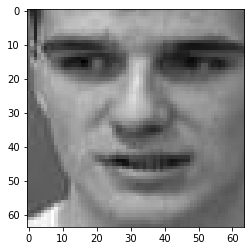

In [454]:
#Sample 170 Actual
image = mpimg.imread("Face/16.jpg")
plt.imshow(image, cmap=plt.cm.gray)

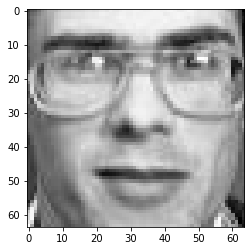

In [455]:
#Sample 170 Prediction
image = mpimg.imread("Face/3.jpg")
plt.imshow(image, cmap=plt.cm.gray)

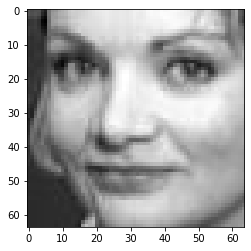

In [456]:
#Sample 122 Actual
image = mpimg.imread("Face/23.jpg")
plt.imshow(image, cmap=plt.cm.gray)

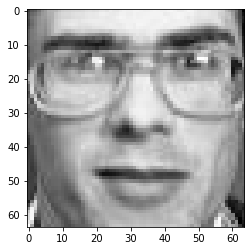

In [457]:
#Sample 122 Prediction
image = mpimg.imread("Face/3.jpg")
plt.imshow(image, cmap=plt.cm.gray)

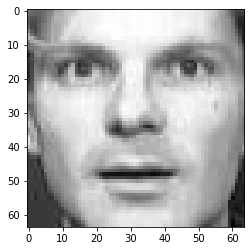

In [458]:
#Sample 370 Actual
image = mpimg.imread("Face/24.jpg")
plt.imshow(image, cmap=plt.cm.gray)

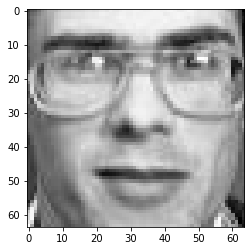

In [459]:
#Sample 370 Prediction
image = mpimg.imread("Face/3.jpg")
plt.imshow(image, cmap=plt.cm.gray)

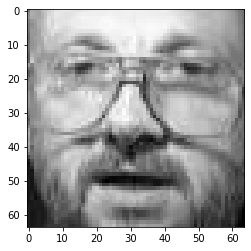

In [460]:
#Sample 397 Actual
image = mpimg.imread("Face/11.jpg")
plt.imshow(image, cmap=plt.cm.gray)

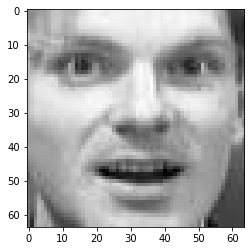

In [461]:
#Sample 397 Prediction
image = mpimg.imread("Face/37.jpg")
plt.imshow(image, cmap=plt.cm.gray)

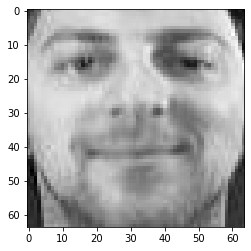

In [462]:
#Sample 335 Actual
image = mpimg.imread("Face/5.jpg")
plt.imshow(image, cmap=plt.cm.gray)

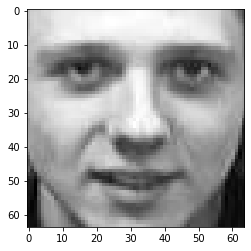

In [463]:
#Sample 335 Prediction
image = mpimg.imread("Face/12.jpg")
plt.imshow(image, cmap=plt.cm.gray)

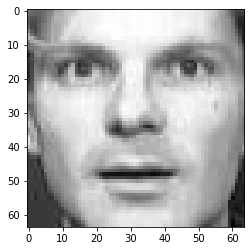

In [464]:
#Sample 353 Actual
image = mpimg.imread("Face/24.jpg")
plt.imshow(image, cmap=plt.cm.gray)

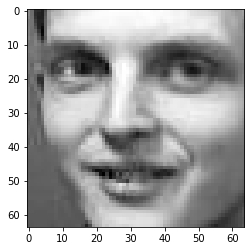

In [465]:
#Sample 353 Prediction
image = mpimg.imread("Face/39.jpg")
plt.imshow(image, cmap=plt.cm.gray)

Next we begin the process to find the best C value for SVM using Gridsearch

In [466]:
#Range for C values
rangeList = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

In [467]:
#c_num = [(i,) for i in rangeList]

In [468]:
#c_num

In [469]:
# create a grid parameter:
param_grid = dict(C = rangeList)
print(param_grid,'\n')

{'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]} 



We run PCA on the entire normalized dataset, and use the result in the Gridsearch

In [470]:
k = 50
my_pca = PCA(n_components = k)

In [471]:
x_normalized_pca = my_pca.fit_transform(x)
#y_normalized_pca = my_pca.transform(label_df)
x_normalized_pca.shape

(400, 50)

In [472]:
# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_SVM, param_grid, cv=10, scoring='accuracy')

In [475]:
grid.fit(x_normalized_pca, y)

GridSearchCV(cv=10, estimator=SVC(C=1, gamma=0.0005, random_state=1),
             param_grid={'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0,
                               50000.0, 100000.0]},
             scoring='accuracy')

Our Results show that C = 10 provides the best results for SVM

In [476]:
print(grid.best_score_)
print(grid.best_params_)

0.9649999999999999
{'C': 10}
